The project focuses on predicting which customers are likely to churn, utilizing data from a US-based telecommunications company that includes demographics,usage, and account information. By applying data science skills, tools, and the CRISP-DM framework, the goal is to understand customer churn. This insight can help businesses mitigate the risk of churn and prevent revenue losses.

Below are some of the questions asked during the EDA.
1) Which group of people are likely to churn ?
2) Which cities have a high churn rate?
3)	Which group of citizens is most likely to have a specific type of contract?
4)	How long have people who are likely to churn been using the service?


# EDA

In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt #a plotting libary
plt.style.use('ggplot')
import scipy
import warnings
warnings.filterwarnings('ignore') 
from numpy import percentile
import statistics 
from sklearn.cluster import KMeans
#from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,balanced_accuracy_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
#from scipy.stats import chi2_contingency 
from statistics import stdev
#from pprint import pprint
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [2]:
#reading from the CSV file--Data sourced from Kaggle
churn_df = pd.read_csv("Telco_customer_churn.csv")
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


In [3]:
#checking columns with null values so that we can treat them correctly and realized that only ChurnReason column has ChurnReason null values, we later found out its because of people who had not churned.
churn_df.isnull().sum()

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [4]:
churn_df.describe() #checking the statistical metrics such as mean, std, min, max etc of the dataset

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
churn_df.info()#checking for the different data types of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
CustomerID          7043 non-null object
Count               7043 non-null int64
Country             7043 non-null object
State               7043 non-null object
City                7043 non-null object
ZipCode             7043 non-null int64
LatLong             7043 non-null object
Latitude            7043 non-null float64
Longitude           7043 non-null float64
Gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
TenureMonths        7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null

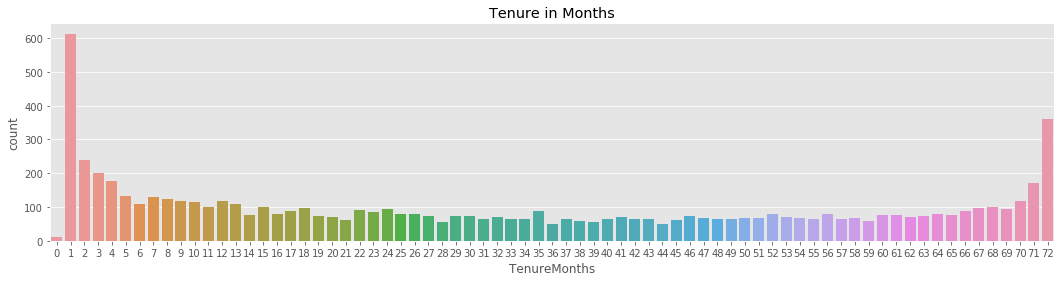

In [6]:
#checking the range of tenure in months for customers in the camapny

def plots_distribution(churn_df, parameter_1, parameter_2):
    f, ax = plt.subplots(figsize=(18, 4))
    ax = sns.countplot(x=parameter_1, data=churn_df)
    plt.title(parameter_2)
    plt.show()
plots_distribution(churn_df,parameter_1 ="TenureMonths", parameter_2 = "Tenure in Months")

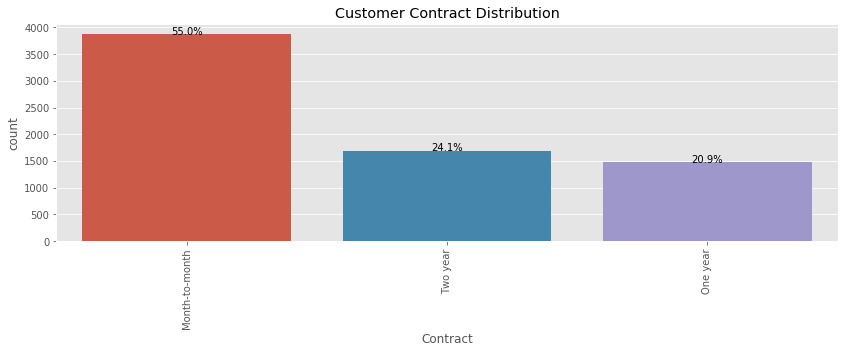

In [7]:

def plots_distribution(churn_df, parameter1, parameter2):
    fig, ax = plt.subplots(figsize=(14, 4))
    ax = sns.countplot(x=parameter1, data=churn_df)
    
    # Add percentage labels on top of each bar
    total = float(len(churn_df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.1%}', ha="center")
    
    # Set x-axis labels to be vertical
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Add title to the plot
    plt.title(parameter2)
    
    plt.show()

plots_distribution(churn_df, parameter1 = "Contract",parameter2 = "Customer Contract Distribution")


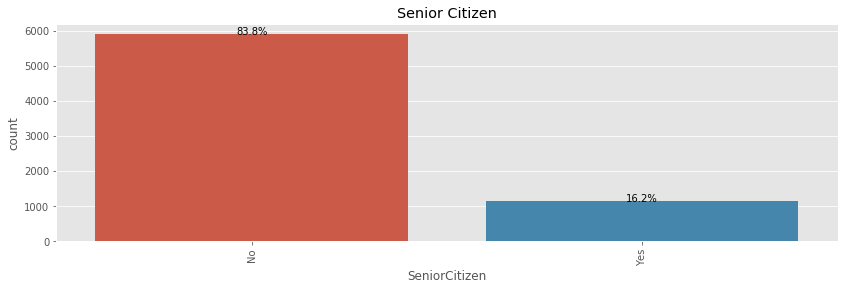

In [8]:
#checking which citizen we have and discovered that we have more non-senior citizen 
plots_distribution(churn_df,parameter1 ="SeniorCitizen", parameter2 = "Senior Citizen")


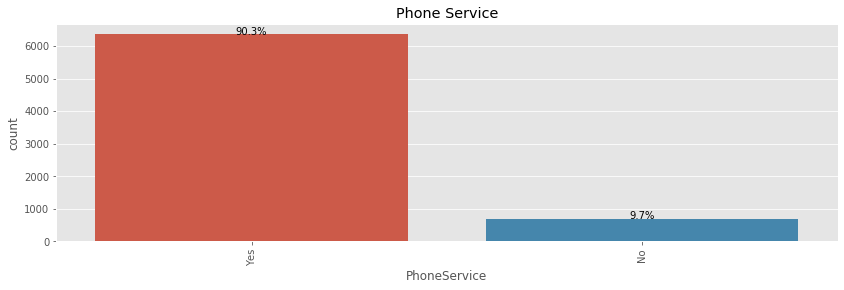

In [9]:
#checking how many customers use Phone service as compared to those who do not.
plots_distribution(churn_df,parameter1 ="PhoneService", parameter2 = "Phone Service")

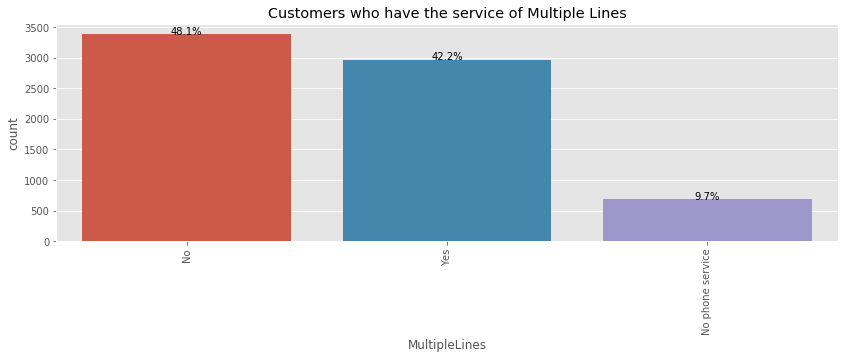

In [10]:
#checking the values
plots_distribution(churn_df,parameter1 ="MultipleLines", parameter2 = "Customers who have the service of Multiple Lines")

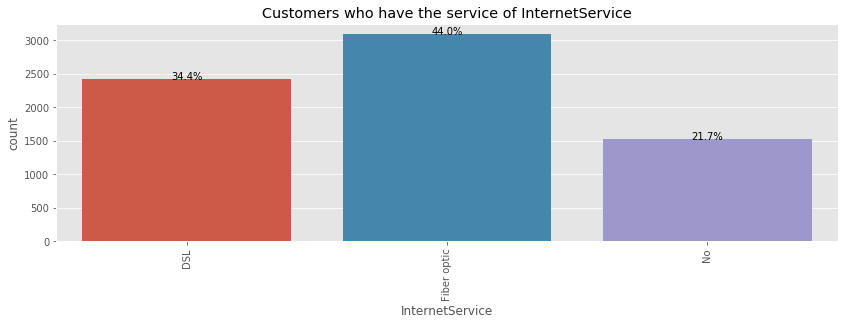

In [11]:
#checking customers who has Internet service from the campany and those who do not.
plots_distribution(churn_df,parameter1 ="InternetService", parameter2 = "Customers who have the service of InternetService")

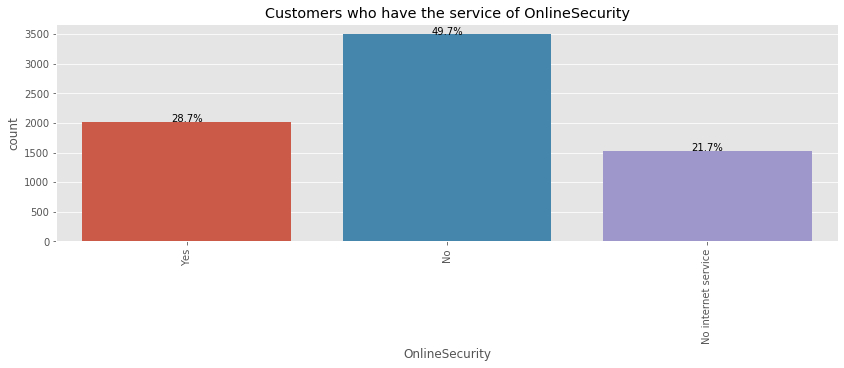

In [12]:
#checking customers who has OnlineSecurity from the campany and those who do not.
plots_distribution(churn_df,parameter1 ="OnlineSecurity", parameter2 = "Customers who have the service of OnlineSecurity")

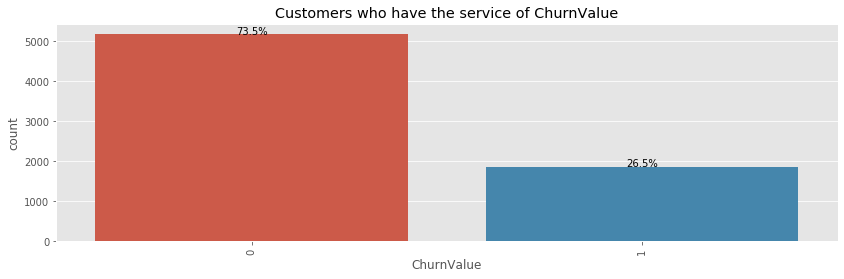

In [13]:
#checking how many people churned VS those who did not
plots_distribution(churn_df,parameter1 ="ChurnValue", parameter2 = "Customers who have the service of ChurnValue")

In [14]:
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


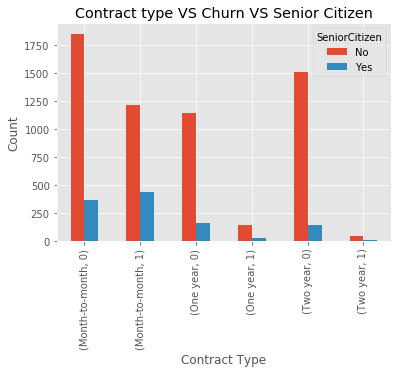

In [15]:
#) Identify the groups of people most likely to churn and their associated contract types, then visualize the results in a bar chart.
def GroupBy_function_5param(churn_df,parameter_1, parameter_2, parameter_3, parameter_4,parameter_5):
    location_counts = churn_df.groupby([parameter_1, parameter_2,parameter_3]).size().unstack(fill_value=0)
    location_counts

    # Plot the value counts as a bar chart
    location_counts.plot(kind='bar')

    plt.title( parameter_4)
    plt.xlabel(parameter_5)
    plt.ylabel('Count')

    # Display the bar chart
    plt.show()

GroupBy_function_5param(churn_df,parameter_1='Contract', parameter_2 = 'ChurnValue', parameter_3='SeniorCitizen', parameter_4 = 'Contract type VS Churn VS Senior Citizen',parameter_5 = 'Contract Type')

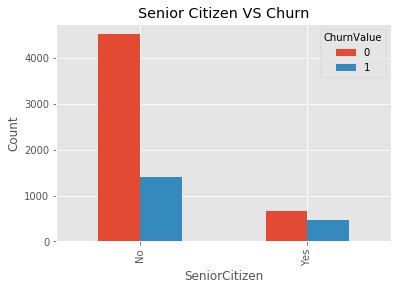

In [16]:
#) Which group of people(senior citizen vs non-senior citizen) are likely to churn
def GroupBy_function(churn_df,parameter_1, parameter_2, parameter_3, parameter_4):
    location_counts = churn_df.groupby([parameter_1, parameter_2]).size().unstack(fill_value=0)
    location_counts

    # Plot the value counts as a bar chart
    location_counts.plot(kind='bar')
    plt.title(parameter_3)
    plt.xlabel(parameter_4)
    plt.ylabel('Count')

    # Display the bar chart
    plt.show()
GroupBy_function(churn_df,parameter_1='SeniorCitizen', parameter_2 = 'ChurnValue', parameter_3 ='Senior Citizen VS Churn', parameter_4 = 'SeniorCitizen')

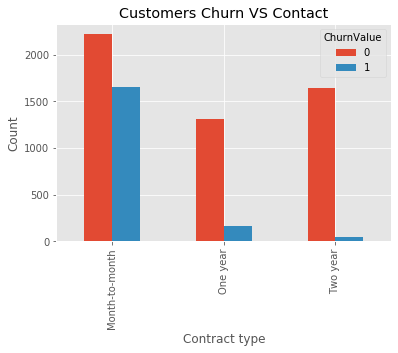

In [17]:
#checking people under which contract are likely to churn, then discovered that month on month customers have a high churn rate compared to others
GroupBy_function(churn_df,parameter_1='Contract', parameter_2 = 'ChurnValue', parameter_3='Customers Churn VS Contact', parameter_4 = 'Contract type')

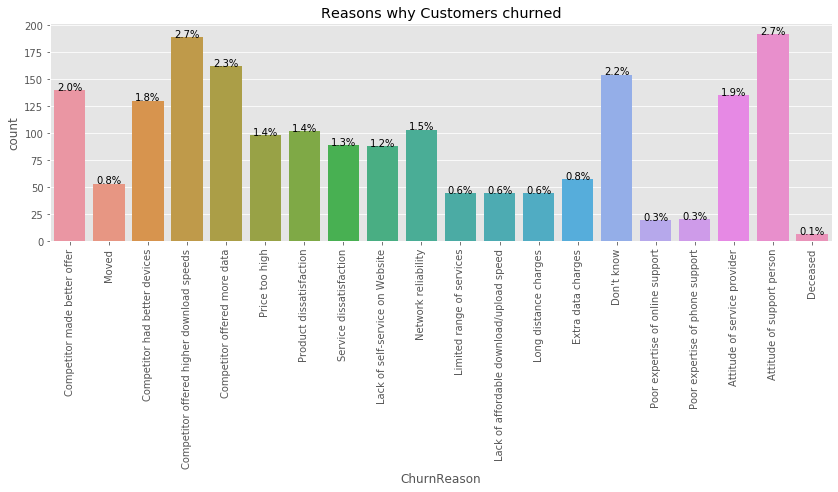

In [18]:
# looking at the reasons why customers churned and most did so because of the attitude of a person offering them support and competitors
plots_distribution(churn_df,parameter1 ="ChurnReason", parameter2 = "Reasons why Customers churned")

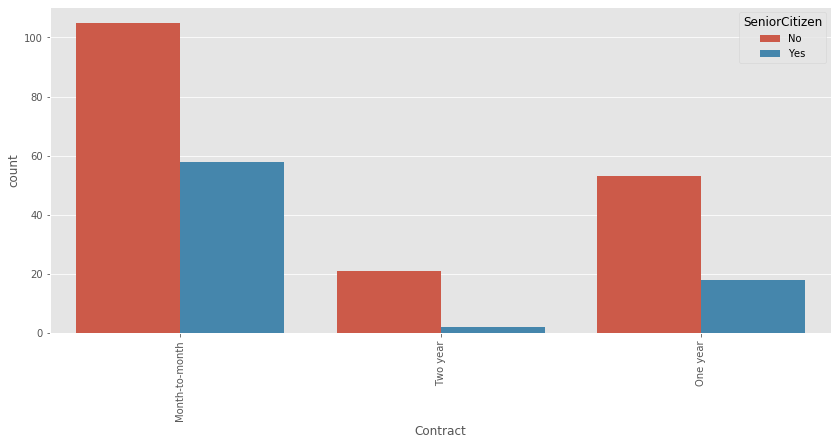

In [19]:
#checking the of numbers of different citizens in each contract type

#checking for people who have churned and pay more or eqal $100 in a month
filtered_df = churn_df[(churn_df['MonthlyCharges'] >= 100)&(churn_df['ChurnValue'] == 1)]
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Contract", hue="SeniorCitizen", data=filtered_df)
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

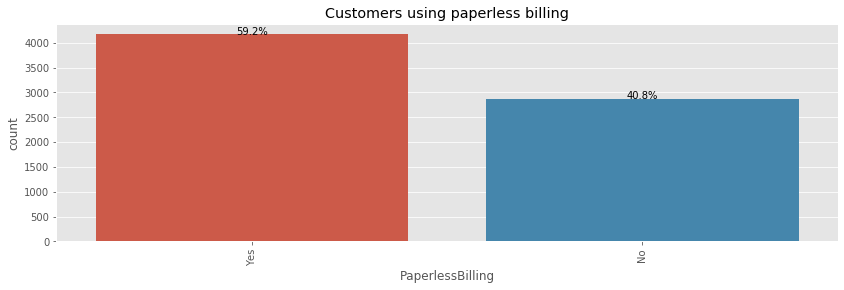

In [20]:
#checking customers who use paperlessbilling VS those who do not.

plots_distribution(churn_df,parameter1 ="PaperlessBilling", parameter2 = "Customers using paperless billing")

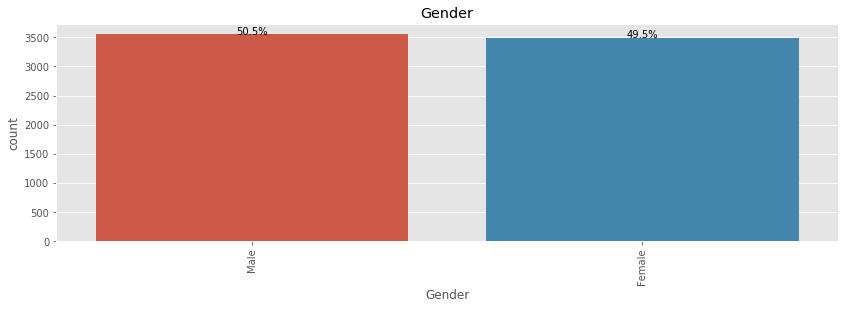

In [21]:
#Checking different genders

plots_distribution(churn_df,parameter1 ="Gender", parameter2 = "Gender")

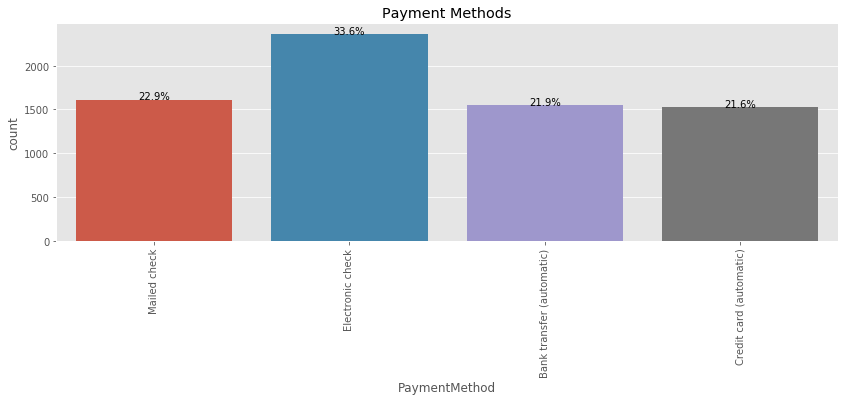

In [22]:
#checking different payment methods used by customers
plots_distribution(churn_df,parameter1 ="PaymentMethod", parameter2 = "Payment Methods")

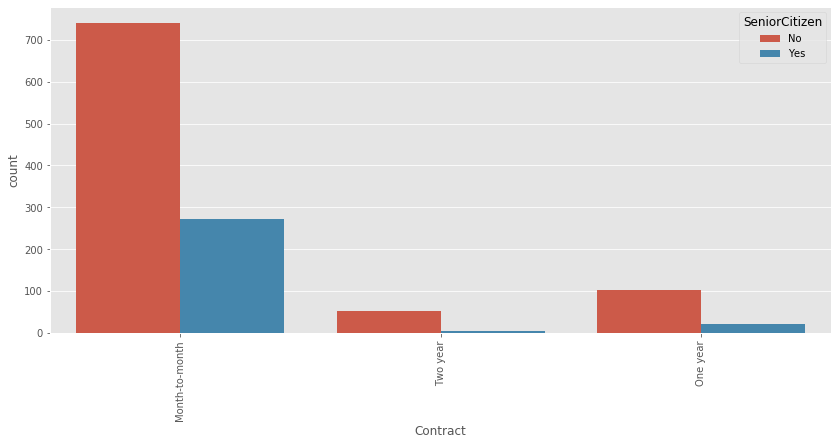

In [23]:
#Checking people with a high churn score greater or equal 80, the contract they are in and that type of citizen they are.
filtered_df = churn_df[(churn_df['ChurnScore'] >=80)]#filtering which the churn Score equla or greater than 80
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Contract", hue="SeniorCitizen", data=filtered_df)
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

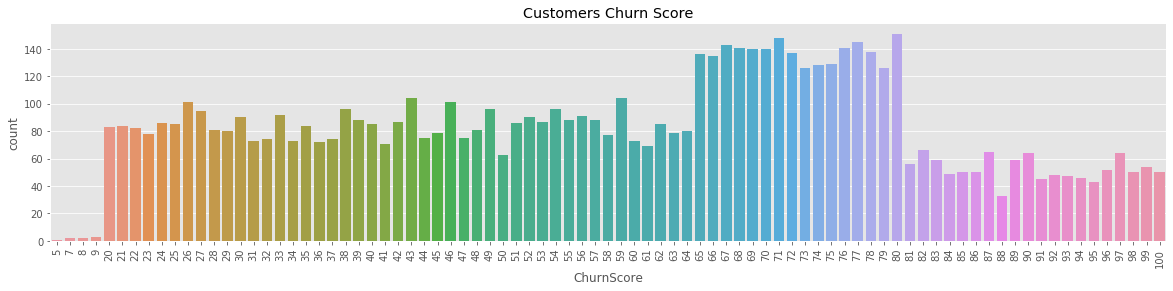

In [24]:
# Churn Score distribution
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.countplot(x="ChurnScore", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Customers Churn Score')
plt.show()


# Data cleaning

In [25]:
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [26]:
churn_df['MonthlyCharges'].min()#checking the minimun value in the Monthly recharge column

18.25

In [27]:
#creating Payment value bands to classify customers as low, medium ect
bins = [17, 25, 45, 65, 85, 119] #creating the bins
labels = ['Ultra Low Value', 'Low Value', 'Medium Value', 'High Value', 'Ultra High value'] #creating the lables to classify the customer

# Create age groups
churn_df['MonthlyCharges_range'] = pd.cut(churn_df['MonthlyCharges'], bins=bins, labels=labels, right=False) #creating a new column for the payment value bands 

# Display the DataFrame
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,High Value


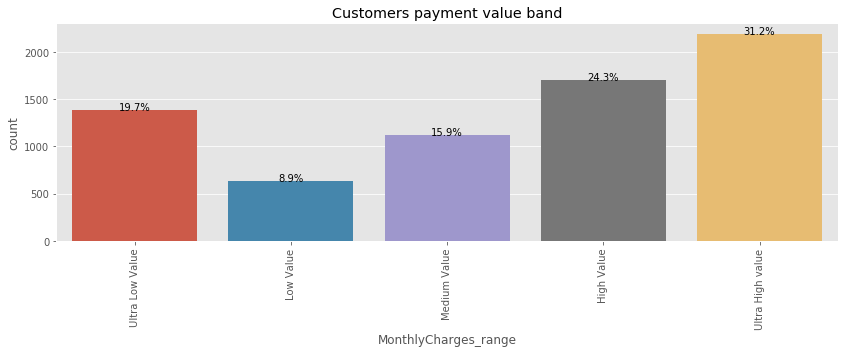

In [28]:
#displaying different the Payment value bands, most customers are on Ultra high value band

plots_distribution(churn_df,parameter1 ="MonthlyCharges_range", parameter2 = "Customers payment value band")

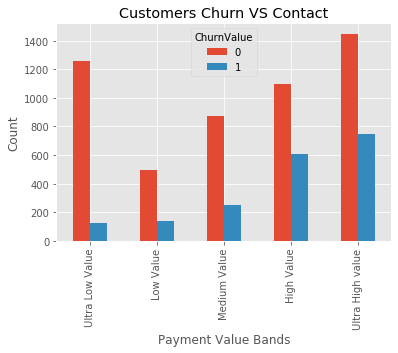

In [29]:
#checking people who are likely to churn and payment value bands they are in

GroupBy_function(churn_df,parameter_1='MonthlyCharges_range', parameter_2 = 'ChurnValue', parameter_3='Customers Churn VS Contact', parameter_4 = 'Payment Value Bands')

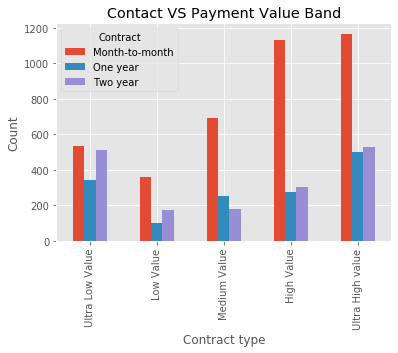

In [30]:
#checking people under each contract and the payment value band they are in

GroupBy_function(churn_df,parameter_1='MonthlyCharges_range', parameter_2 = 'Contract', parameter_3='Contact VS Payment Value Band', parameter_4 = 'Contract type')

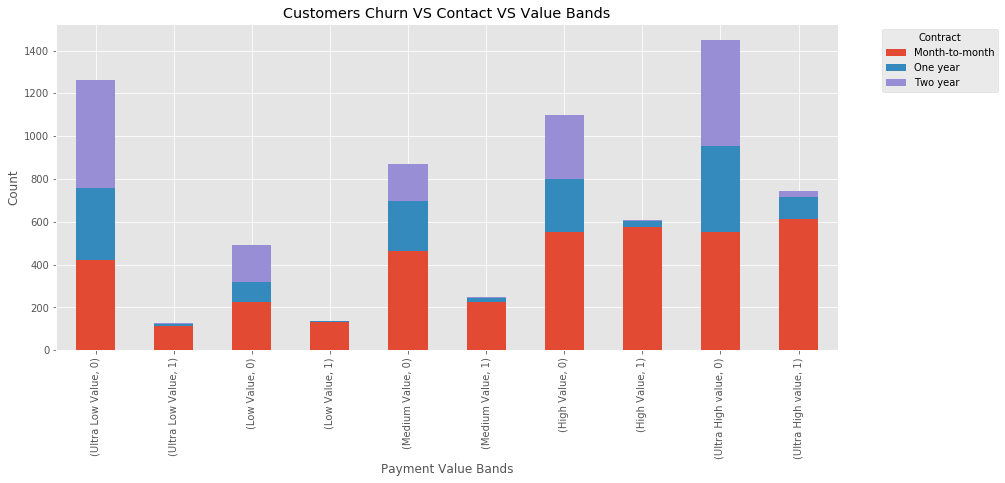

In [31]:
def GroupBy_function_5param(churn_df, parameter_1, parameter_2, parameter_3, parameter_4, parameter_5):
    location_counts = churn_df.groupby([parameter_1, parameter_2, parameter_3]).size().unstack(fill_value=0)
    
    # Plot the value counts as a stacked bar chart
    location_counts.plot(kind='bar', stacked=True, figsize=(14, 6))

    plt.title(parameter_4)
    plt.xlabel(parameter_5)
    plt.ylabel('Count')

    # Display the stacked bar chart
    plt.legend(title=parameter_3, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

GroupBy_function_5param(churn_df,parameter_1='MonthlyCharges_range', parameter_2 = 'ChurnValue',parameter_3='Contract', parameter_4='Customers Churn VS Contact VS Value Bands', parameter_5 ='Payment Value Bands')


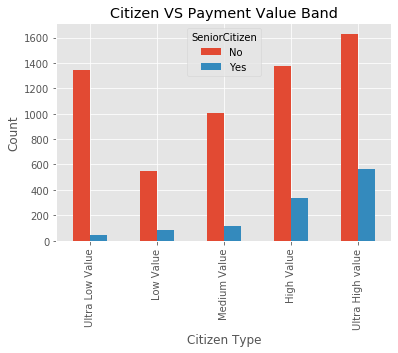

In [32]:
#checking different citizens and the payment value bans they are in.
GroupBy_function(churn_df,parameter_1='MonthlyCharges_range', parameter_2 = 'SeniorCitizen', parameter_3='Citizen VS Payment Value Band', parameter_4 = 'Citizen Type')

In [33]:
churn_df['TenureMonths'].min()# the maximum months a customer is with the company

0

In [34]:
#Payment range
# Define bins and labels
bins = [0, 3, 6, 12, 24, 36, 48,60, 73]
labels = ['3 Months', '6 Months', '1 Year', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years']

# Create age groups
churn_df['Tenure_Range'] = pd.cut(churn_df['TenureMonths'], bins=bins, labels=labels, right=False)#creating tenure months ranges column

# Display the DataFrame
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,High Value,3 Months


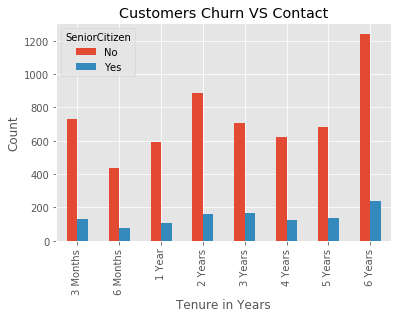

In [35]:
#Checking citizen and the tenure(years) they are in
GroupBy_function(churn_df,parameter_1='Tenure_Range', parameter_2 = 'SeniorCitizen', parameter_3='Customers Churn VS Contact', parameter_4 = 'Tenure in Years')

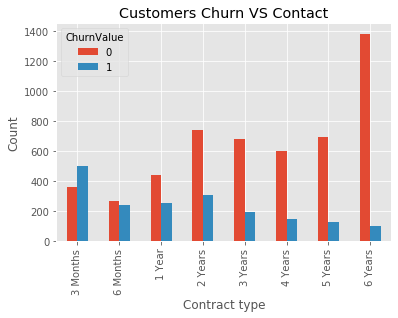

In [36]:
# customer with how many years are likely to churn 
GroupBy_function(churn_df,parameter_1='Tenure_Range', parameter_2 = 'ChurnValue', parameter_3='Customers Churn VS Contact', parameter_4 = 'Contract type')

In [37]:
# replacing null values in Reason type column with (Did not Churn) for people who did not churn 
churn_df.loc[churn_df['ChurnValue'] == 0, 'ChurnReason'] = churn_df.loc[churn_df['ChurnValue'] == 0, 'ChurnReason'].fillna('Did not Churn')
churn_df['ChurnReason'].isnull().sum()

0

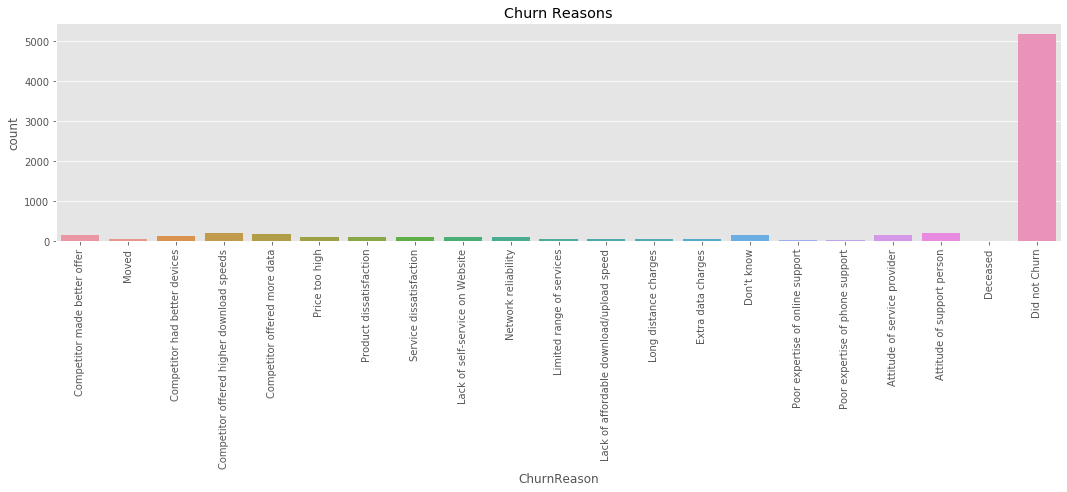

In [38]:
# Checking different reasons for leaving the campany
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="ChurnReason", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Churn Reasons')
plt.show()

In [39]:
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months


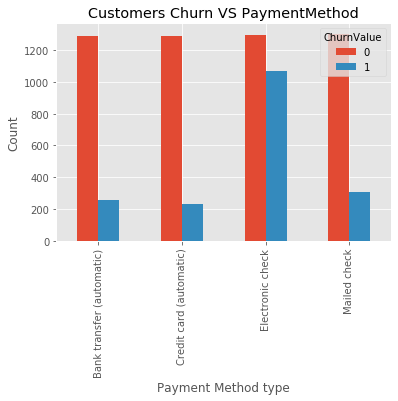

In [40]:
# customer under which payment method are likely to churn

GroupBy_function(churn_df,parameter_1='PaymentMethod', parameter_2 = 'ChurnValue', parameter_3='Customers Churn VS PaymentMethod', parameter_4 = 'Payment Method type')

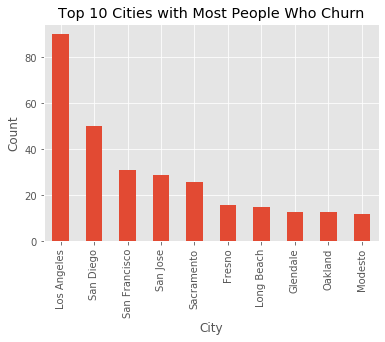

In [41]:
# Group by City and ChurnValue, then unstack to get counts
location_counts = churn_df.groupby(['City', 'ChurnValue']).size().unstack(fill_value=0)

# Select the top 10 cities with the most people who will churn (ChurnValue = 1)
top_10_cities_churn = location_counts[1].nlargest(10)

# Plot the data
top_10_cities_churn.plot(kind='bar')

plt.title('Top 10 Cities with Most People Who Churn')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()


#GroupBy_function(churn_df,parameter_1='City', parameter_2 = 'ChurnValue', parameter_3='Top 10 Cities with Most People Who Churn', parameter_4 = 'City')

In [42]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
CustomerID              7043 non-null object
Count                   7043 non-null int64
Country                 7043 non-null object
State                   7043 non-null object
City                    7043 non-null object
ZipCode                 7043 non-null int64
LatLong                 7043 non-null object
Latitude                7043 non-null float64
Longitude               7043 non-null float64
Gender                  7043 non-null object
SeniorCitizen           7043 non-null object
Partner                 7043 non-null object
Dependents              7043 non-null object
TenureMonths            7043 non-null int64
PhoneService            7043 non-null object
MultipleLines           7043 non-null object
InternetService         7043 non-null object
OnlineSecurity          7043 non-null object
OnlineBackup            7043 non-null object
DeviceProtection        7043 non-null o

In [43]:
#churn_df['Tenure_Range'].unique()

nan_rows_A = churn_df[churn_df['Tenure_Range'].isna()]
nan_rows_A.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range


# Feature Engineering

In [44]:
# replacing categorical values with numerical values; used label encoder to make the values binary
# Label Encoding
# Columns to be encoded
columns_to_encode = ['Gender','PaymentMethod', 'Contract', 'ChurnReason', 'City']

# Instantiate LabelEncoder
le = LabelEncoder()

# Loop through columns and apply LabelEncoder
for column in columns_to_encode:
    churn_df[column] = le.fit_transform(churn_df[column])

# Verify the encoding for 'City'
print(churn_df['ChurnReason'].unique())

[ 3 14  2  4  5 18 19 20 11 15 12 10 13  9  8 16 17  0  1  6  7]


In [45]:
# Define the order for the ordinal categories
monthly_charges_order = ['Ultra Low Value', 'Low Value', 'Medium Value', 'High Value', 'Ultra High value']
tenure_range_order = ['3 Months', '6 Months', '1 Year', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years']

# Initialize OrdinalEncoder with specified category orders
ordinal_encoder = OrdinalEncoder(categories=[monthly_charges_order, tenure_range_order])

# Fit and transform the data
churn_df[['MonthlyCharges_range', 'Tenure_Range']] = ordinal_encoder.fit_transform(churn_df[['MonthlyCharges_range', 'Tenure_Range']])

# Print the encoded DataFrame
churn_df.head(2)


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,562,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,3,53.85,108.15,Yes,1,86,3239,3,2.0,0.0
1,9237-HQITU,1,United States,California,562,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,2,70.70,151.65,Yes,1,67,2701,14,3.0,0.0


In [46]:
# Define the mapping
mapping = {'No': 0, 'Yes': 1}

# List of columns to convert
columns_to_convert = ['SeniorCitizen', 'PhoneService', 'PaperlessBilling']

# Convert and replace values in one step
for column in columns_to_convert:
    churn_df[column] = churn_df[column].replace(mapping)

# Optional: Verify the conversions
churn_df.head(2)


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,562,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,3,53.85,108.15,Yes,1,86,3239,3,2.0,0.0
1,9237-HQITU,1,United States,California,562,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,2,70.70,151.65,Yes,1,67,2701,14,3.0,0.0


In [47]:
# Define the mapping
mapping = {'No': 0, 'Yes': 1, 'No internet service': 2, 'No phone service': 2, 'DSL': 1, 'Fiber optic': 1}

# List of columns to convert
columns_to_convert = [
    'StreamingMovies', 'StreamingTV', 'TechSupport','SeniorCitizen',  
    'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'PhoneService',
    'MultipleLines', 'InternetService', 'ChurnLabel','PaperlessBilling' 
]

# Convert and replace values in one step
for column in columns_to_convert:
    churn_df[column] = churn_df[column].astype(str).replace(mapping).astype(int)

# Optional: Verify the conversions
print(churn_df[columns_to_convert].head(1))

   StreamingMovies  StreamingTV  TechSupport  SeniorCitizen  DeviceProtection  \
0                0            0            0              0                 0   

   OnlineBackup  OnlineSecurity  PhoneService  MultipleLines  InternetService  \
0             1               1             1              0                1   

   ChurnLabel  PaperlessBilling  
0           1                 1  


In [48]:
# Check for and display non-numeric values in 'TotalCharges', the convert the values into float
non_numeric = churn_df[~churn_df['TotalCharges'].apply(lambda x: x.replace('.', '', 1).isdigit())]
non_numeric.head(1)

# Convert 'TotalCharges' to numeric, coerce errors to NaN, and drop rows with NaN values
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df.dropna(subset=['TotalCharges'], inplace=True)

# Convert the column to float
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)



In [49]:
# Counting the numbers of services each customer has subscribed to within the business.
columns_to_sum = ['PhoneService','StreamingMovies', 'StreamingTV' ,
                'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 
                'MultipleLines', 'InternetService', 'TechSupport' ] 
# Sum values that are 1 for each row 
#churn_df['Sum_of_services'] = churn_df[columns_to_sum].sum(axis=1)
churn_df['Sum_of_services'] = churn_df[columns_to_sum].apply(lambda x: (x == 1).sum(), axis=1)
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range,Sum_of_services
0,3668-QPYBK,1,United States,California,562,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,53.85,108.15,1,1,86,3239,3,2.0,0.0,4


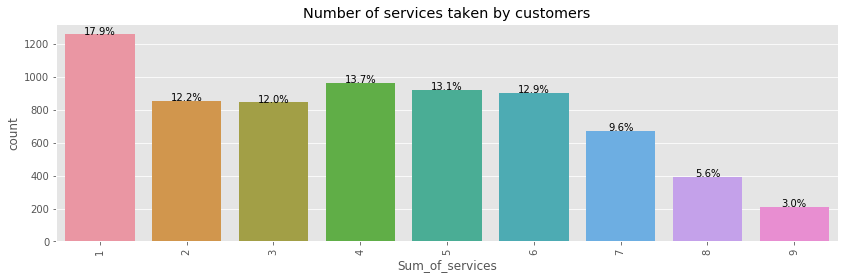

In [50]:
#using a graph to visualize the services that customers have subscribed to and most customers subscribed on one service and few people on 9.
plots_distribution(churn_df,parameter1 ="Sum_of_services", parameter2 = "Number of services taken by customers")

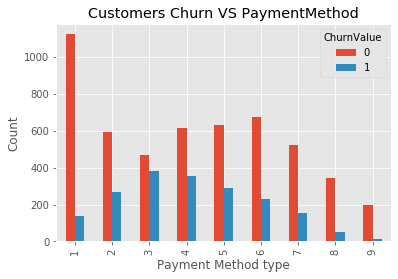

In [51]:
#Determining if there's a correlation between the number of services a customer subscribes to and their likelihood of churning
GroupBy_function(churn_df,parameter_1='Sum_of_services', parameter_2 = 'ChurnValue', parameter_3='Customers Churn VS PaymentMethod', parameter_4 = 'Payment Method type')

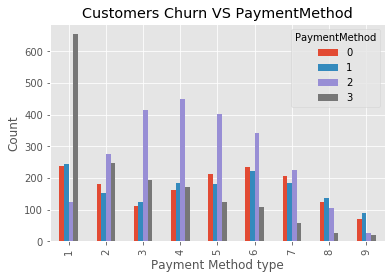

In [52]:
#Determining  if there's a relationship between the payment method that customers use and the number of services they've subscribed to
GroupBy_function(churn_df,parameter_1='Sum_of_services', parameter_2 = 'PaymentMethod', parameter_3='Customers Churn VS PaymentMethod', parameter_4 = 'Payment Method type')

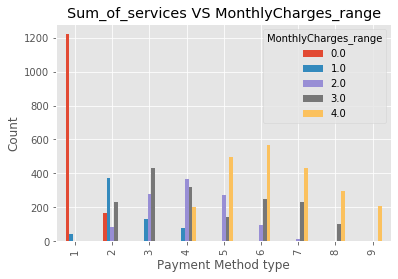

In [53]:
#determining whether a customer's value band and the amount of services they subscribe to are related; 0 is the Low valw band and 4.0 is Ultra high value band
GroupBy_function(churn_df,parameter_1='Sum_of_services', parameter_2 = 'MonthlyCharges_range', parameter_3='Sum_of_services VS MonthlyCharges_range', parameter_4 = 'Payment Method type')

In [54]:
#droppting columns which are not to be used in the model
churn_df = churn_df.drop(columns=['State', 'Country','Count','ZipCode','LatLong','Latitude','Longitude','Dependents','Partner','CustomerID','ChurnLabel','ChurnScore'])#'MonthlyCharges_range','Tenure_Range','Tenure_Range'
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
City                    7032 non-null int32
Gender                  7032 non-null int32
SeniorCitizen           7032 non-null int32
TenureMonths            7032 non-null int64
PhoneService            7032 non-null int32
MultipleLines           7032 non-null int32
InternetService         7032 non-null int32
OnlineSecurity          7032 non-null int32
OnlineBackup            7032 non-null int32
DeviceProtection        7032 non-null int32
TechSupport             7032 non-null int32
StreamingTV             7032 non-null int32
StreamingMovies         7032 non-null int32
Contract                7032 non-null int32
PaperlessBilling        7032 non-null int32
PaymentMethod           7032 non-null int32
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null float64
ChurnValue              7032 non-null int64
CLTV                    7032 non-null int64
ChurnReas

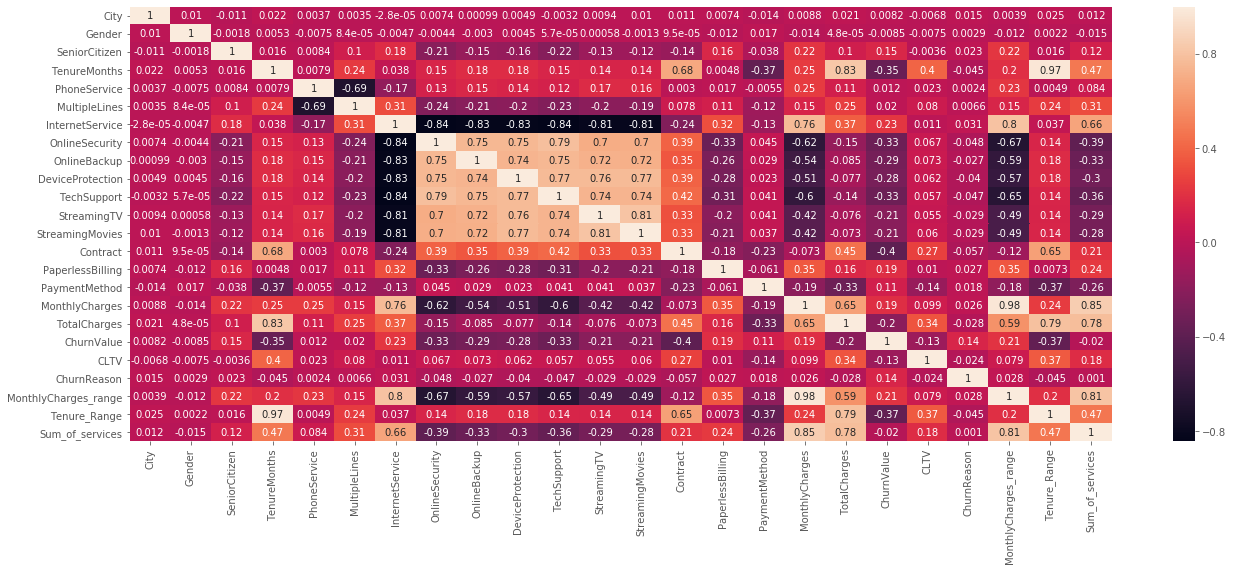

In [55]:
#displaying the correlation between features using heat map
df_small = churn_df
plt.figure(figsize=(22,8))
correlation_mat = df_small.corr()
ax= sns.heatmap(correlation_mat, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Checking the Skewness of the dataframe

In [56]:
skewness = churn_df.skew() # the SeniorCitizen has skew of 1.8 and its highly positively skewed (right-skewed) distribution. Which results in a longer right tail since there are more lower values and fewer higher values.
print(skewness)

City                   -0.184867
Gender                 -0.018776
SeniorCitizen           1.831103
TenureMonths            0.237731
PhoneService           -2.729727
MultipleLines           0.597820
InternetService        -1.379453
OnlineSecurity          0.546635
OnlineBackup            0.409736
DeviceProtection        0.412001
TechSupport             0.538040
StreamingTV             0.321930
StreamingMovies         0.313326
Contract                0.635149
PaperlessBilling       -0.377503
PaymentMethod          -0.169388
MonthlyCharges         -0.222103
TotalCharges            0.961642
ChurnValue              1.060622
CLTV                   -0.311327
ChurnReason             1.631215
MonthlyCharges_range   -0.465071
Tenure_Range           -0.198274
Sum_of_services         0.222132
dtype: float64


City
Skewness Before : -0.18


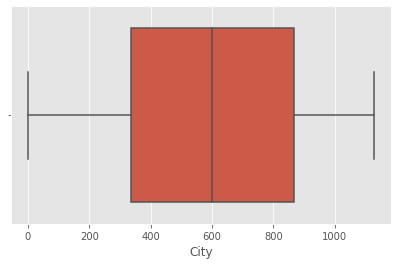

Gender
Skewness Before : -0.02


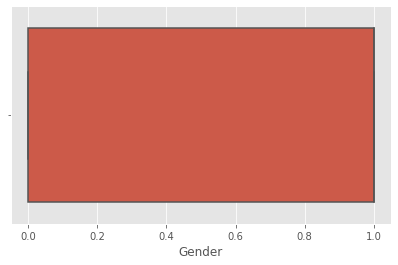

SeniorCitizen
Skewness Before : 1.83


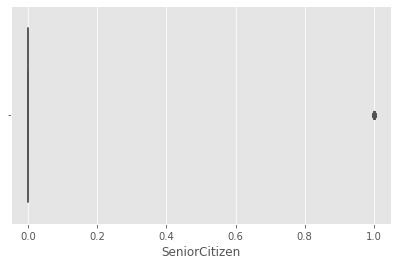

TenureMonths
Skewness Before : 0.24


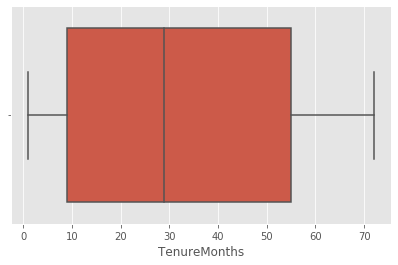

PhoneService
Skewness Before : -2.73


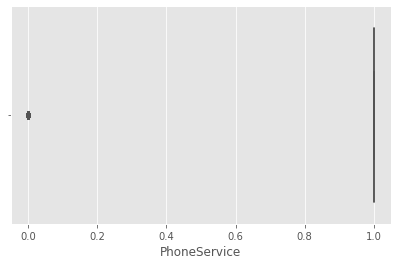

MultipleLines
Skewness Before : 0.6


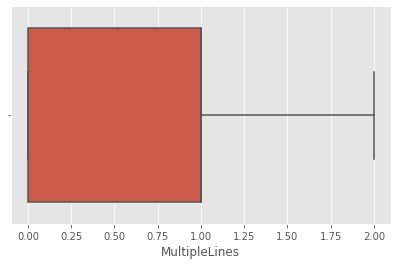

InternetService
Skewness Before : -1.38


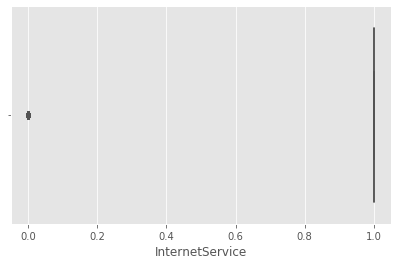

OnlineSecurity
Skewness Before : 0.55


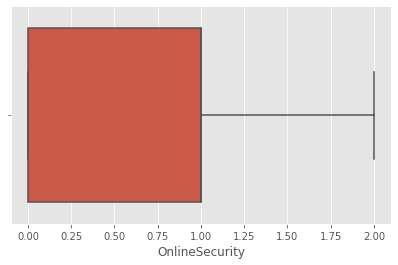

OnlineBackup
Skewness Before : 0.41


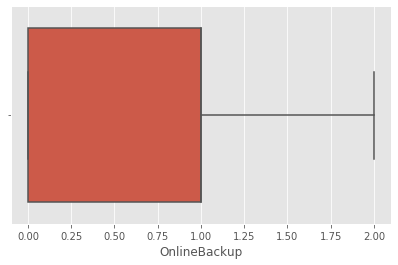

DeviceProtection
Skewness Before : 0.41


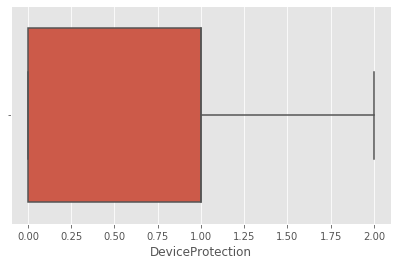

TechSupport
Skewness Before : 0.54


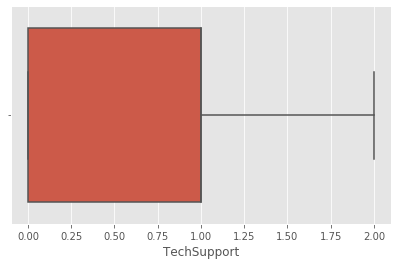

StreamingTV
Skewness Before : 0.32


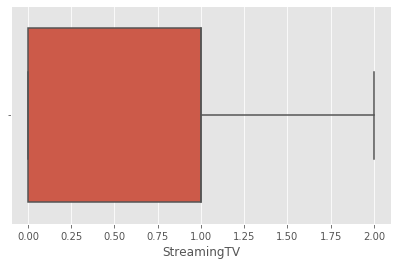

StreamingMovies
Skewness Before : 0.31


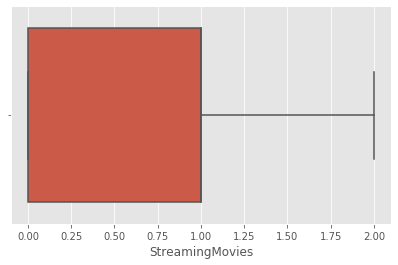

Contract
Skewness Before : 0.64


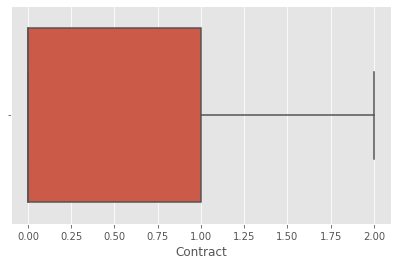

PaperlessBilling
Skewness Before : -0.38


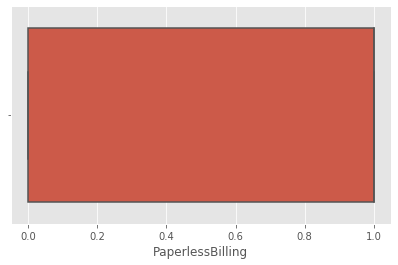

PaymentMethod
Skewness Before : -0.17


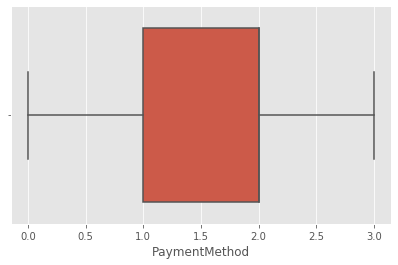

MonthlyCharges
Skewness Before : -0.22


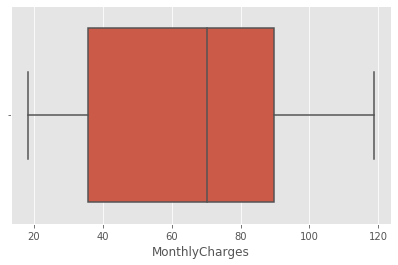

TotalCharges
Skewness Before : 0.96


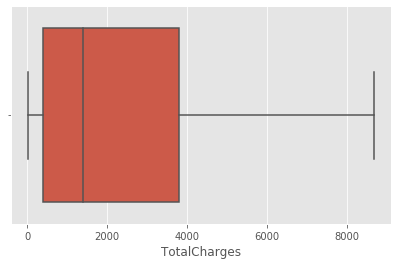

ChurnValue
Skewness Before : 1.06


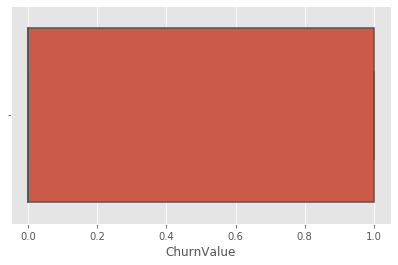

CLTV
Skewness Before : -0.31


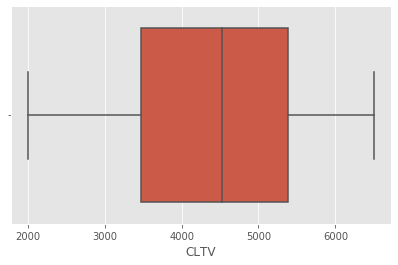

ChurnReason
Skewness Before : 1.63


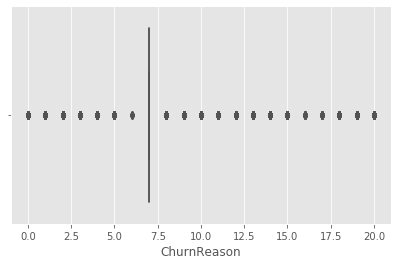

MonthlyCharges_range
Skewness Before : -0.47


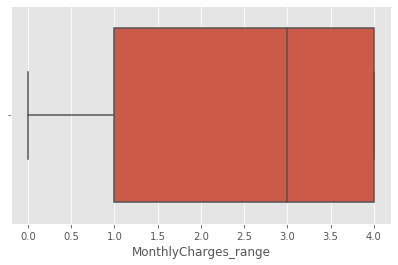

Tenure_Range
Skewness Before : -0.2


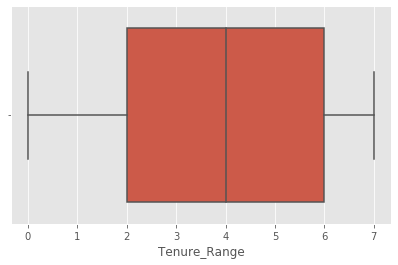

Sum_of_services
Skewness Before : 0.22


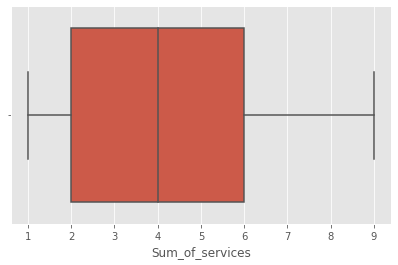

In [57]:
#checking outliars
for col in churn_df:
    print(col)
    print('Skewness Before :', round(churn_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=churn_df[col])
    plt.show()

In [58]:
#Decided to capp the outliers as the dataset is very small to avoid losing it.
def churn_capping(df):
    """
    This function replace outliers from all numeric columns in a DataFrame using the IQR method.
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    Returns:
    pd.DataFrame: A new DataFrame with outliers capped.
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.12)
            q3 = df[col].quantile(0.88)
            iqr = q3 - q1
            upper_whisker = q3 + (1.5 * iqr)
            lower_whisker = q1 - (1.5 * iqr)
            df[col] = np.where(df[col] > upper_whisker, upper_whisker,
                               np.where(df[col] < lower_whisker, lower_whisker, df[col]))
    return df
 
final_churn_df = churn_capping(churn_df)

City
Skewness After : -0.18


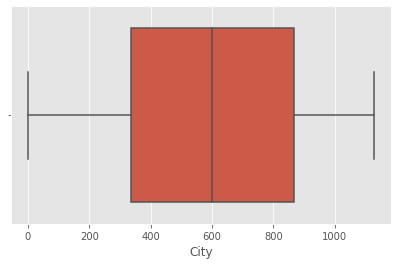

Gender
Skewness After : -0.02


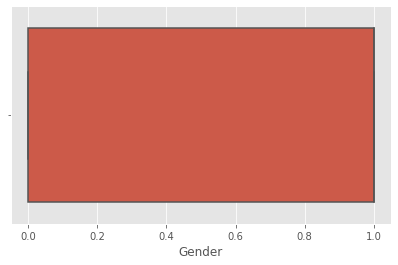

SeniorCitizen
Skewness After : 1.83


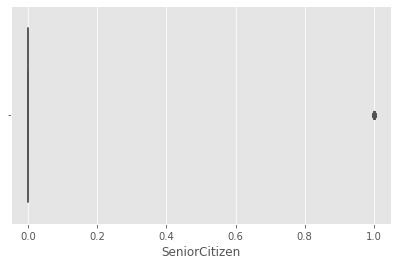

TenureMonths
Skewness After : 0.24


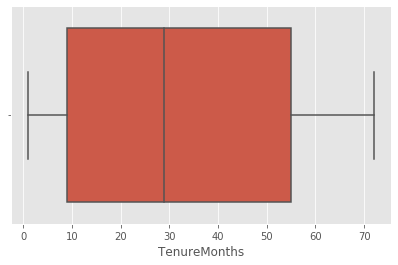

PhoneService
Skewness After : 0


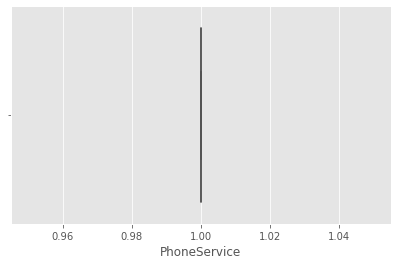

MultipleLines
Skewness After : 0.6


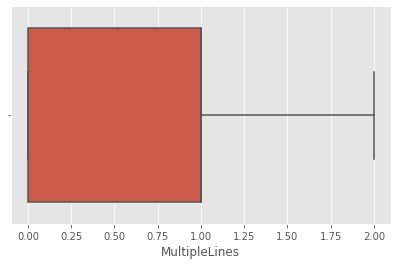

InternetService
Skewness After : -1.38


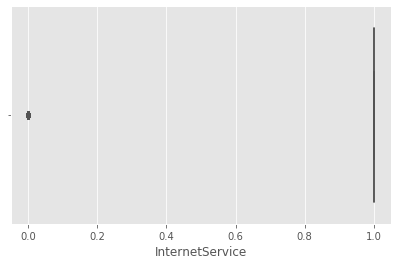

OnlineSecurity
Skewness After : 0.55


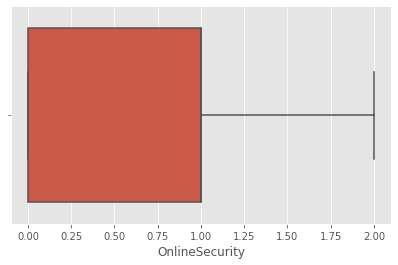

OnlineBackup
Skewness After : 0.41


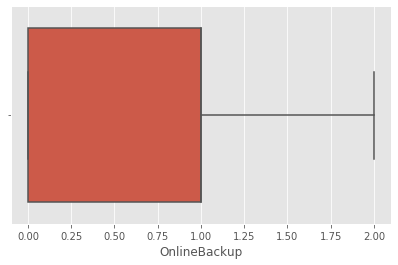

DeviceProtection
Skewness After : 0.41


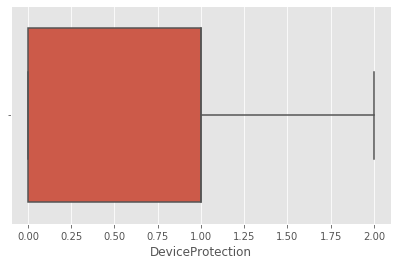

TechSupport
Skewness After : 0.54


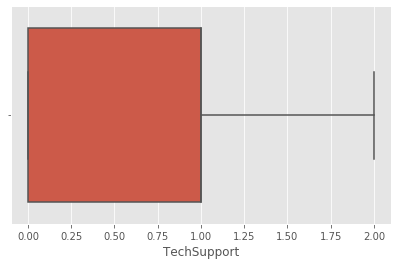

StreamingTV
Skewness After : 0.32


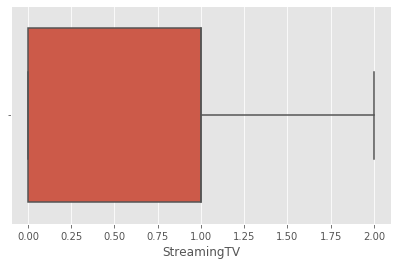

StreamingMovies
Skewness After : 0.31


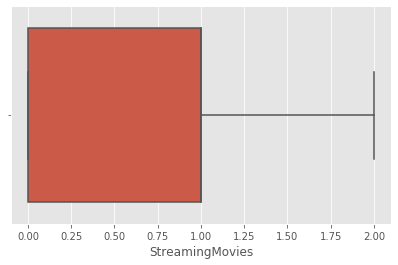

Contract
Skewness After : 0.64


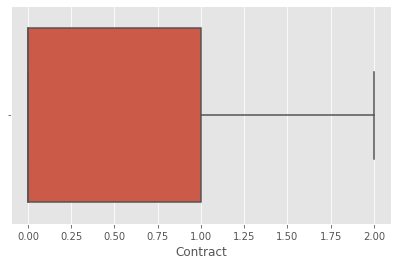

PaperlessBilling
Skewness After : -0.38


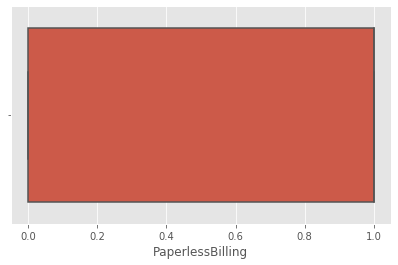

PaymentMethod
Skewness After : -0.17


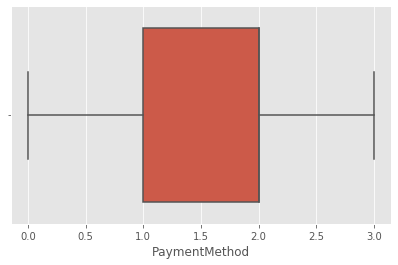

MonthlyCharges
Skewness After : -0.22


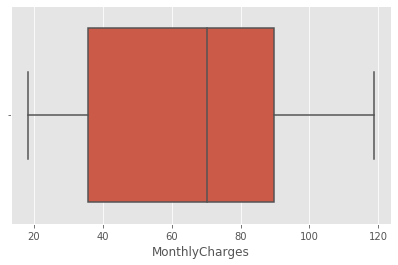

TotalCharges
Skewness After : 0.96


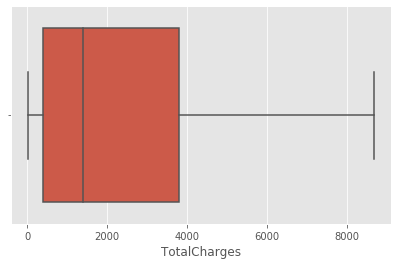

ChurnValue
Skewness After : 1.06


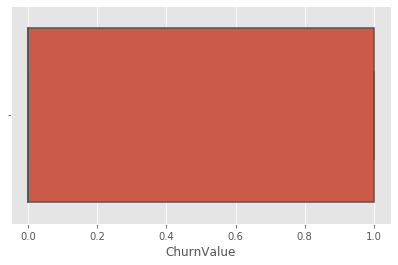

CLTV
Skewness After : -0.31


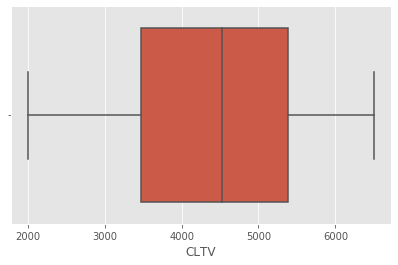

ChurnReason
Skewness After : -0.05


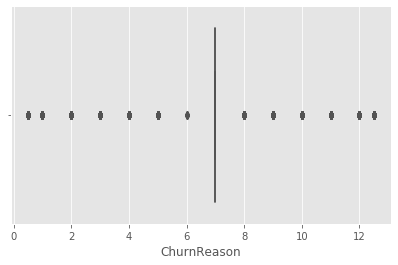

MonthlyCharges_range
Skewness After : -0.47


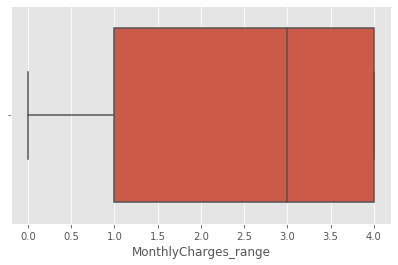

Tenure_Range
Skewness After : -0.2


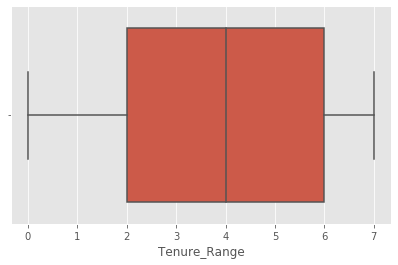

Sum_of_services
Skewness After : 0.22


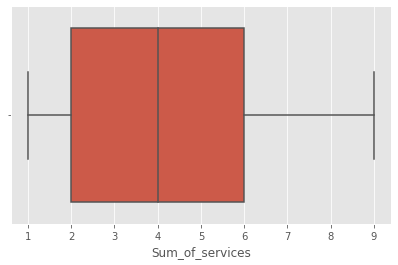

In [59]:
for col in final_churn_df:
    print(col)
    print('Skewness After :', round(final_churn_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=final_churn_df[col])
    plt.show()

In [60]:
skewness = final_churn_df.skew() 
print(skewness)

City                   -0.184867
Gender                 -0.018776
SeniorCitizen           1.831103
TenureMonths            0.237731
PhoneService            0.000000
MultipleLines           0.597820
InternetService        -1.379453
OnlineSecurity          0.546635
OnlineBackup            0.409736
DeviceProtection        0.412001
TechSupport             0.538040
StreamingTV             0.321930
StreamingMovies         0.313326
Contract                0.635149
PaperlessBilling       -0.377503
PaymentMethod          -0.169388
MonthlyCharges         -0.222103
TotalCharges            0.961642
ChurnValue              1.060622
CLTV                   -0.311327
ChurnReason            -0.052702
MonthlyCharges_range   -0.465071
Tenure_Range           -0.198274
Sum_of_services         0.222132
dtype: float64


# Feature Selection

In [61]:

X  = final_churn_df.drop(columns=['ChurnValue'])#droping th target from the feature to be selected for the model and assign them to X
y = churn_df['ChurnValue']# assign the target to y
y.head(3)

0    1.0
1    1.0
2    1.0
Name: ChurnValue, dtype: float64

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)
 
# Fit the model
logreg.fit(X_train, y_train)
 
# Print the coefficients and intercept
#print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)
 
# Evaluate the model on the test set
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
 
# Feature selection using L1 regularization (Lasso)
# SelectFromModel will select features whose importance is greater than the mean importance of all the features
feature_selector = SelectFromModel(logreg, threshold='mean')
feature_selector.fit(X_train, y_train)
 
# Get selected feature indices
selected_features_indices = feature_selector.get_support(indices=True)
 
# Print selected feature indices
print("Selected Feature Indices:", selected_features_indices)
 
# Transform the training and testing sets to include only selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)
 
# Initialize logistic regression model with selected features
logreg_selected = LogisticRegression(max_iter=1000)
 
# Fit the model with selected features
logreg_selected.fit(X_train_selected, y_train)
 
# Evaluate the model on the test set with selected features
y_pred_selected = logreg_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)

Intercept: [-0.13546627]
Accuracy: 0.8137440758293839
Selected Feature Indices: [ 2  5  7 10 12 13 14 21 22]
Accuracy with Selected Features: 0.7990521327014218


In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Print the coefficients and intercept
#print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

# Evaluate the model on the test set
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Feature selection using L1 regularization (Lasso)
feature_selector = SelectFromModel(logreg, threshold='mean')
feature_selector.fit(X_train, y_train)

# Get selected feature indices and names
selected_features_indices = feature_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features_indices]
selected_feature_scores = logreg.coef_[0][selected_features_indices]

# Print selected feature indices, names, and scores
print("Selected Feature Indices:", selected_features_indices)
print("Selected Feature Names and Scores:")
for name, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{name}: {score}")

# Transform the training and testing sets to include only selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Initialize logistic regression model with selected features
logreg_selected = LogisticRegression(max_iter=1000)

# Fit the model with selected features
logreg_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set with selected features
y_pred_selected = logreg_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)


Intercept: [-0.13546627]
Accuracy: 0.8137440758293839
Selected Feature Indices: [ 2  5  7 10 12 13 14 21 22]
Selected Feature Names and Scores:
SeniorCitizen: 0.22190401060147663
MultipleLines: 0.37726677531435204
OnlineSecurity: -0.3809858089258319
TechSupport: -0.2945933234715699
StreamingMovies: 0.16728004727320817
Contract: -0.661078818220757
PaperlessBilling: 0.36815789187943687
Tenure_Range: -0.38907767895782264
Sum_of_services: -0.22647694021886378
Accuracy with Selected Features: 0.7990521327014218


# FEATURE SELECTION 2

In [65]:
# Get the feature variables and target variable
hr_vars = final_churn_df.columns.values.tolist()
y = ['ChurnValue']
X = [i for i in hr_vars if i not in y]

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize RFE with the logistic regression model and number of features to select
rfe = RFE(model, 10)

# Fit RFE
rfe = rfe.fit(final_churn_df[X], final_churn_df[y].values.ravel())

# Print selected features and their rankings
#print("Selected Features (Support):", rfe.support_)
#print("Feature Rankings:", rfe.ranking_)

# Get the selected feature names
selected_features = [feature for feature, support in zip(X, rfe.support_) if support]
print("Selected Feature Names:")
for feature in selected_features:
    print(feature)

# Feature ranking with names
print("\nFeature Ranking with Names:")
ranking = sorted(zip(X, rfe.ranking_), key=lambda x: x[1])
for feature, rank in ranking:
    print(f"{feature}: {rank}")


Selected Feature Names:
SeniorCitizen
MultipleLines
InternetService
OnlineSecurity
TechSupport
StreamingMovies
Contract
PaperlessBilling
MonthlyCharges_range
Tenure_Range

Feature Ranking with Names:
SeniorCitizen: 1
MultipleLines: 1
InternetService: 1
OnlineSecurity: 1
TechSupport: 1
StreamingMovies: 1
Contract: 1
PaperlessBilling: 1
MonthlyCharges_range: 1
Tenure_Range: 1
StreamingTV: 2
PhoneService: 3
Sum_of_services: 4
DeviceProtection: 5
MonthlyCharges: 6
OnlineBackup: 7
PaymentMethod: 8
Gender: 9
TenureMonths: 10
ChurnReason: 11
TotalCharges: 12
City: 13
CLTV: 14


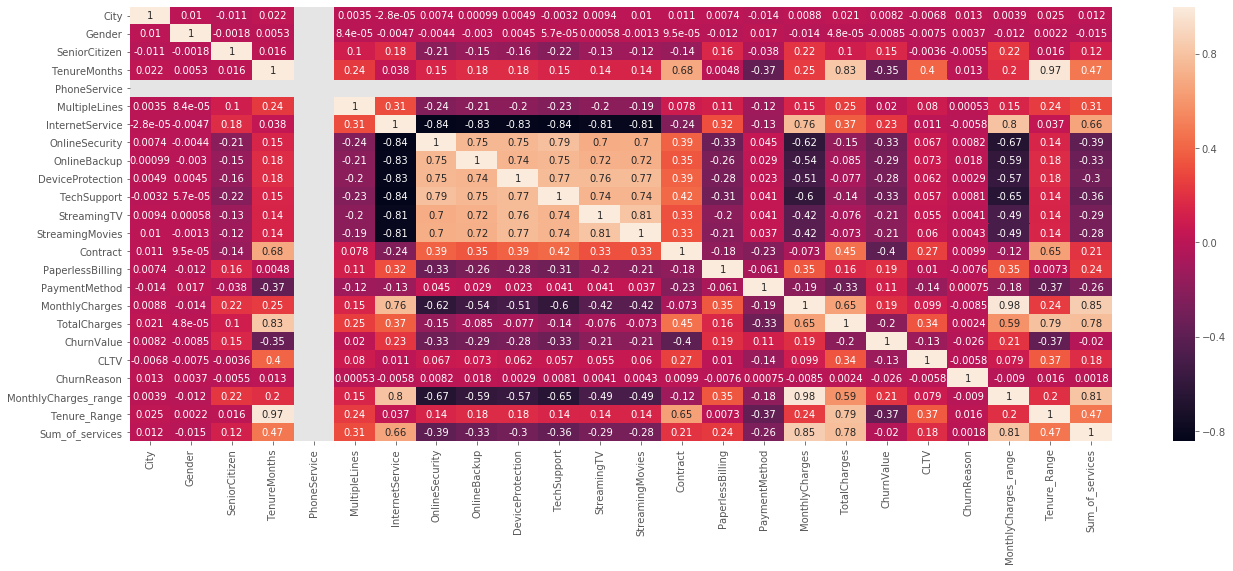

In [66]:
#displaying the correlation between features using heat map
df_small = churn_df
plt.figure(figsize=(22,8))
correlation_mat = df_small.corr()
ax= sns.heatmap(correlation_mat, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Random Forest

In [67]:
#selecting data to be fed to the model, we are not scalling data on Random forest model as it can its robust and can handle irregularities
selected_data=churn_df.drop(columns=['ChurnValue'])
selected_data.head(1)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range,Sum_of_services
0,562.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,3.0,53.85,108.15,3239.0,3.0,2.0,0.0,4.0


In [68]:
#Features selected to be used for predictions
X1 = selected_data[['SeniorCitizen','MonthlyCharges_range','Tenure_Range','Sum_of_services','Contract','ChurnReason']]#data is not scaled as random forest can handle such data
y1 =churn_df['ChurnValue'] 

In [69]:
# Assuming X1 and y1 are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=100)
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Cross-Validation
scores = cross_val_score(rf, X1, y1, cv=10, scoring='accuracy')
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

# Feature Importance
importances = rf.feature_importances_
feature_names = X1.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


Accuracy: 0.9753554502369668
Cross-Validation Scores: [0.97869318 0.97443182 0.97727273 0.9772404  0.97581792 0.98719772
 0.97297297 0.97012802 0.9715505  0.96723647]
Average Cross-Validation Score: 0.9752541733627261
                Feature  Importance
5           ChurnReason    0.721306
4              Contract    0.136564
2          Tenure_Range    0.083093
1  MonthlyCharges_range    0.037937
3       Sum_of_services    0.017528
0         SeniorCitizen    0.003573


In [70]:
#comparing the train and test scores, checking the recall, precion etc
def Model_evaluation(model_initials,x_test,y_test,x_train, y_train, model_name = 'model'):
    y_pred= model_initials.predict(x_test)
    class_report_train = classification_report(y_test, model_initials.predict(x_test))
    print (f'--------------{model_name} -------------')
    print (model_initials.score(x_train, y_train), '- Train model score')
    print(accuracy_score(y_test, model_initials.predict(x_test)), '- Test model score \n\n')
    print(class_report_train)
    
results = Model_evaluation(rf,x_test,y_test,x_train, y_train,model_name = 'Random Forest')

--------------Random Forest -------------
0.9776513612352702 - Train model score
0.9753554502369668 - Test model score 


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1522
         1.0       1.00      0.91      0.95       588

    accuracy                           0.98      2110
   macro avg       0.98      0.96      0.97      2110
weighted avg       0.98      0.98      0.97      2110



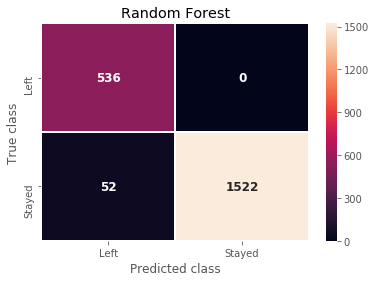

In [71]:
#Using the confusion matrix to see true and the false predisctions
def model_confudion_matrix(model_initials, x_test,y_test,x_train, y_train,model_name = 'model'):
    y_pred = model_initials.predict(x_test)
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    forest_cm = confusion_matrix(y_pred, y_test, [1,0])
    ax = sns.heatmap(forest_cm, annot=True, fmt='.0f', linewidths=0.5, xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"], annot_kws={"ha": 'center', "va": 'center', 'fontsize': 12, 'weight': 'bold'})

    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(f'{model_name}') 
    plt.savefig('Random_Forest.png', bbox_inches='tight')  # bbox_inches='tight' adjusts the padding to fit everything properly
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
results = model_confudion_matrix(rf, x_test,y_test,x_train, y_train,model_name = 'Random Forest')

# Data scaling

In [72]:
Scale_df =final_churn_df.drop(columns=['ChurnValue'])
y2 = churn_df['ChurnValue']
Scale_df.head(2)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range,Sum_of_services
0,562.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,3.0,53.85,108.15,3239.0,3.0,2.0,0.0,4.0
1,562.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,70.70,151.65,2701.0,12.5,3.0,0.0,2.0


In [73]:
 #For Logistic Regression and SVM because they are affected by noise in the data unlike the random forest

In [74]:
Scaler = MinMaxScaler() 
scaled_data = Scaler.fit_transform(Scale_df)
scaled_data = pd.DataFrame(scaled_data, columns=[Scale_df])
scaled_data.head(2)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range,Sum_of_services
0,0.498227,1.0,0.0,0.014085,0.0,0.0,1.0,0.5,0.5,0.0,...,0.0,1.0,1.000000,0.354229,0.01031,0.274850,0.208333,0.50,0.0,0.375
1,0.498227,0.0,0.0,0.014085,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.666667,0.521891,0.01533,0.155215,1.000000,0.75,0.0,0.125


In [75]:
# scaled selected feature to fit to the model
x2 =  scaled_data[['SeniorCitizen','MonthlyCharges_range','Tenure_Range','Sum_of_services','Contract','ChurnReason']]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

# Logistic Regression

In [77]:
#Fitting
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.803


In [79]:
results = Model_evaluation(logreg,x_test,y_test,x_train, y_train,model_name = 'LogisticRegression')

--------------LogisticRegression -------------
0.7887037789516457 - Train model score
0.8028436018957346 - Test model score 


              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1522
         1.0       0.70      0.51      0.59       588

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



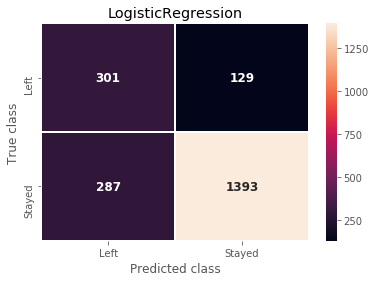

In [80]:
#Using the confusion matrix to see true and the false predisctions
results = model_confudion_matrix(logreg, x_test,y_test,x_train, y_train,model_name = 'LogisticRegression')

# SUPPORT VECTOR MACHINE

In [81]:
#Fitting
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
#accuracy
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.900


In [83]:
results = Model_evaluation(svc,x_test,y_test,x_train, y_train,model_name = 'Support vector machine')

--------------Support vector machine -------------
0.9022754977651362 - Train model score
0.9004739336492891 - Test model score 


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1522
         1.0       1.00      0.64      0.78       588

    accuracy                           0.90      2110
   macro avg       0.94      0.82      0.86      2110
weighted avg       0.91      0.90      0.89      2110



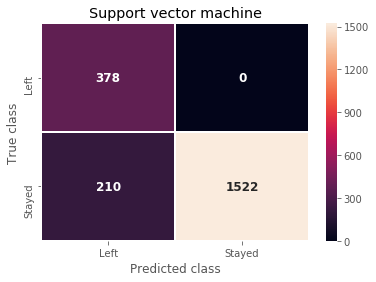

In [84]:
results = model_confudion_matrix(svc, x_test,y_test,x_train, y_train,model_name = 'Support vector machine')

# Feature Importance

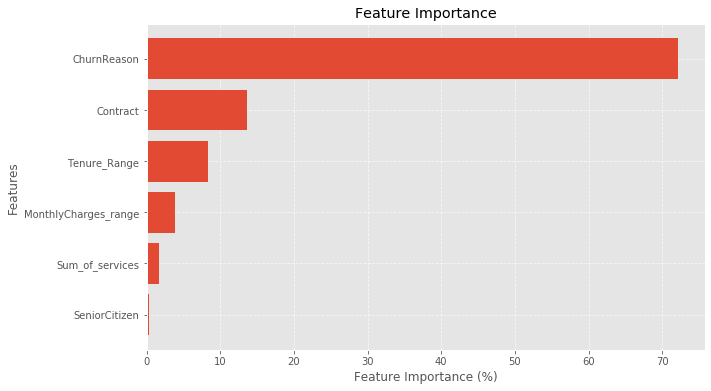

In [85]:
#checking the contribution of the selected features
feature_labels = np.array(['SeniorCitizen','MonthlyCharges_range','Tenure_Range','Sum_of_services','Contract','ChurnReason']) #'Gender',','PhoneService','InternetService','OnlineSecurity'
importance = rf.feature_importances_

# Sort feature importances and feature labels by importance
sorted_indexes = np.argsort(importance)
sorted_importance = importance[sorted_indexes]
sorted_feature_labels = feature_labels[sorted_indexes]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance * 100.0, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_labels)
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()   